###   Name: Sefika Efeoglu
###   Number : 799932

# Setting

A polling institute wants to be able to estimate an individual’s income from his/her personal data (see einkommen.train). To this aim, 30.000 individuals were interviewed concerning the features summarized below. For some of the individuals, not all features are
available. Crucially, the income of only 5.000 of the interviewee’s is known.

##                     Income Prediction Project


Load the data into Python and preprocess it. Choose adequate data transformations,
normalizations etc. and decide on how to deal with missing values (marked with “?”).
Consider which kinds of features the preprocessed data shall contain. Once you have
preprocessed the data, train a model to predict a person’s income group and apply it to
the 25.000 individuals whose income group is unknown. Identify a suitable learning method
and implement it in Python. Train and evaluate the model. Provide a short documentation
and motivation of each of your steps.


## Information about Dataset
* Age
* Employment type (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,State-gov, Without-pay, Never-worked)
* Weighting factor to compensate for an interview-dependent selection bias
* Level of education (Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assocvoc, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th, Masters, Doctorate, Preschool)
* Schooling/training period
* Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
* Employment area (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
* Partnership (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
* Ethnicity (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
* Gender (Female, Male)
* Gains on financial assets
* Losses on financial assets
* Weekly working time
* Country of birth (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba,Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong Kong, Holand-Netherlands)
* Income (≤ 50k, > 50k)



### Road Map
This is a classification problem.
* Categorical variables are converted to numerical variables
* Dealing with missing values
* Feature selection
* Model Selection
* Model Training
* Predict unknown income with the model

### Definition of Libraries which we need to generate a model and process the data for model evaluation

In [1]:
# Definition of libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

## Data Integration

* I get the data from the einkommen.train file and define the necessary columns which mentioned above

In [2]:
# definition of columns
columns= ['Age','Employment_Type','Weighting_Factor', 'Education','School_Period',
        'Marital_Status','Employment_Area','Partnership','Ethnicity','Gender','Gain_Financial','Losses_Financial',
         'Weekly_Working_Time','Birth_Country','Income']

data_income = pd.read_csv('einkommen.train', names =columns)

*  When this line below runs we will see these values:

* ?        25000
* '<=50K'    3779
* '>50K'     1221


In [3]:
# The count of income which is needed to predict is showed below when this line runs
print(data_income['Income'].value_counts())

 ?        25000
 <=50K     3779
 >50K      1221
Name: Income, dtype: int64


In [4]:

data_income['Income'] = data_income['Income'].replace(' <=50K', 0)
data_income['Income'] = data_income['Income'].replace(' >50K', 1)

print(data_income['Income'].value_counts())

 ?    25000
0      3779
1      1221
Name: Income, dtype: int64


## Feature Representation

In [5]:
data_income.head()

,Age,Employment_Type,Weighting_Factor,Education,School_Period,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gain_Financial,Losses_Financial,Weekly_Working_Time,Birth_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


 ### EDA Pairplot

C:\Users\sefik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sefik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\sefik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


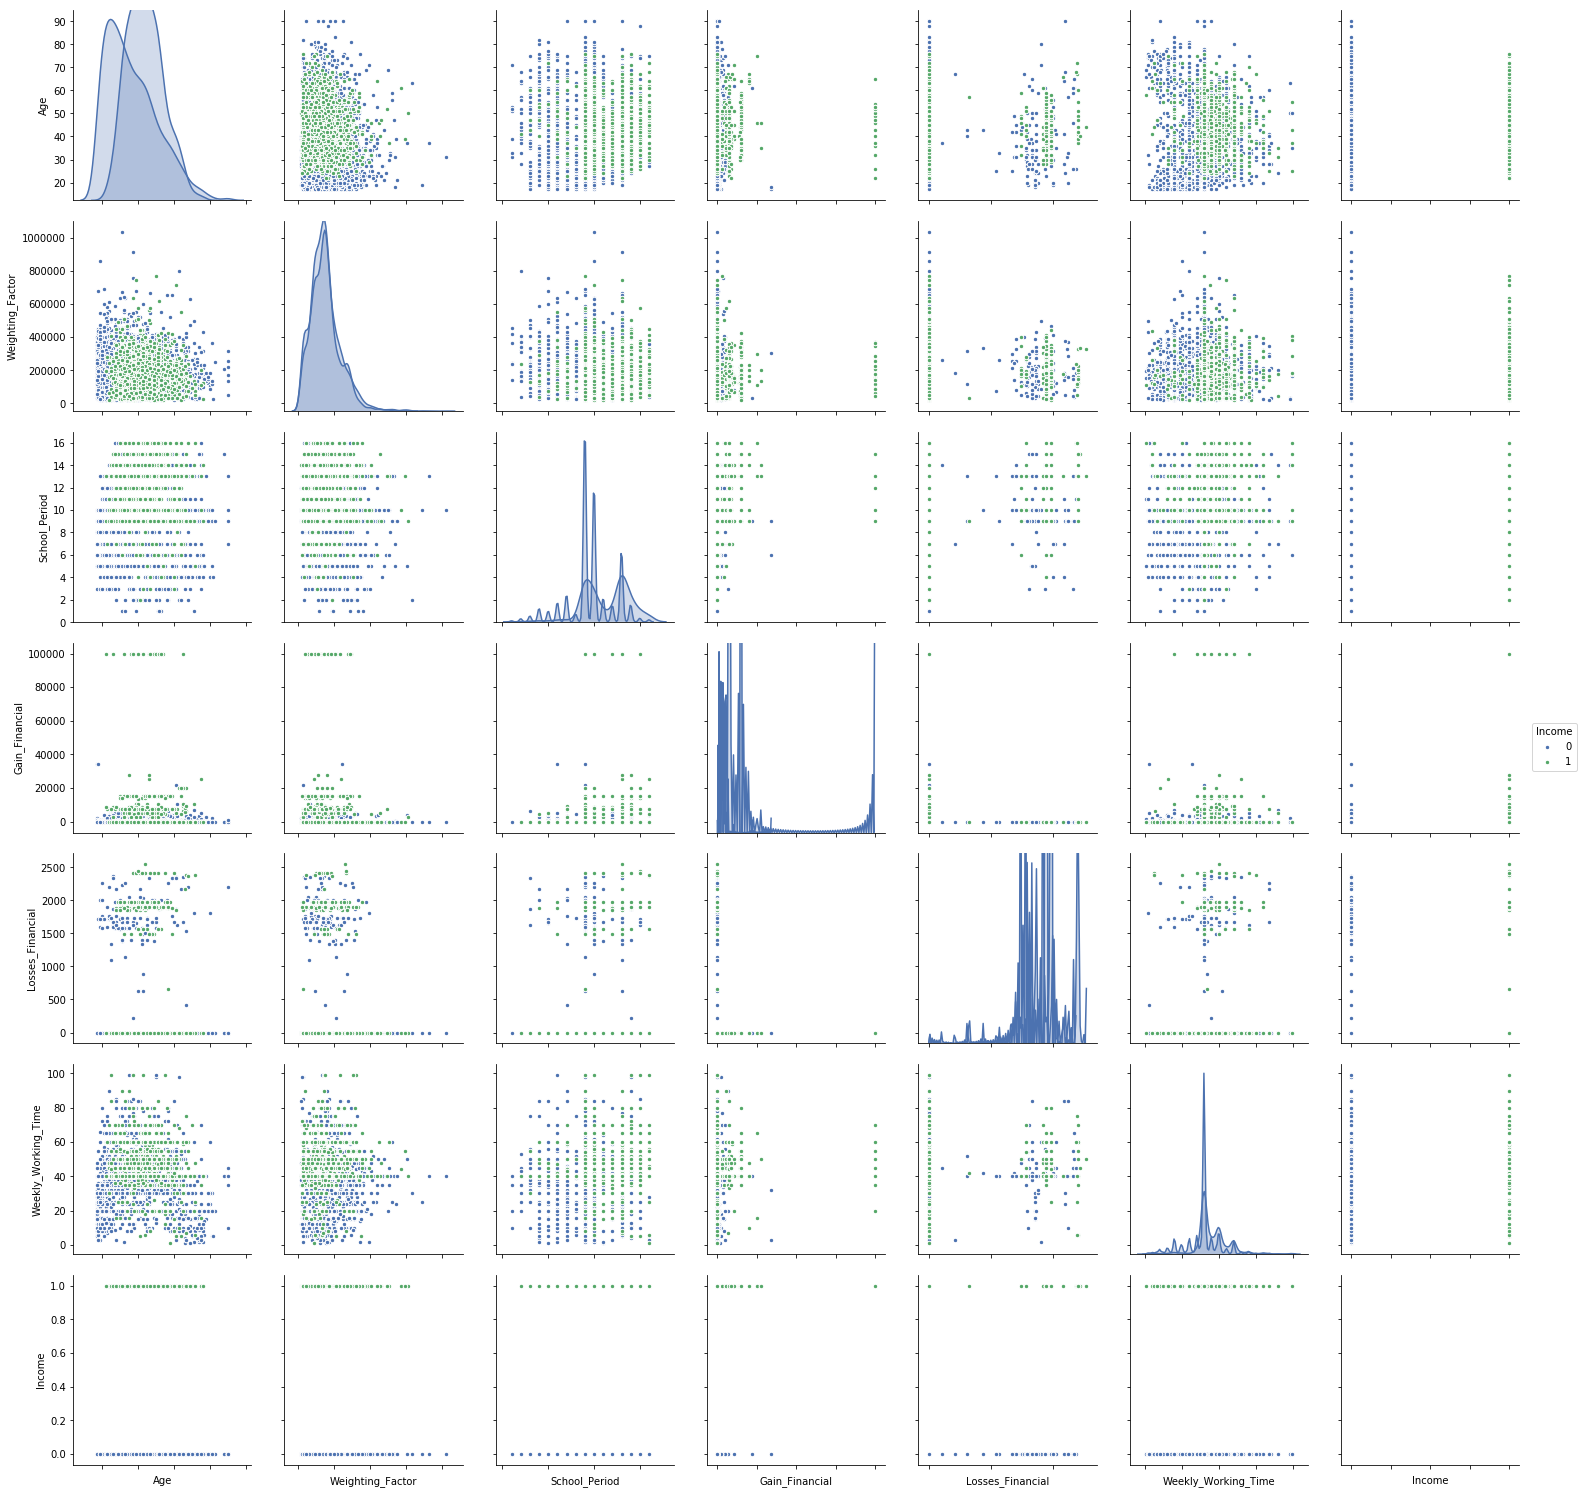

In [6]:
#pair plots of entire dataset
pp = sns.pairplot(data_income.iloc[:5000], hue = 'Income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

### Correlation of Numeric Attributes

In [7]:
# correlation function which shows correlation between two numeric attributes
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)


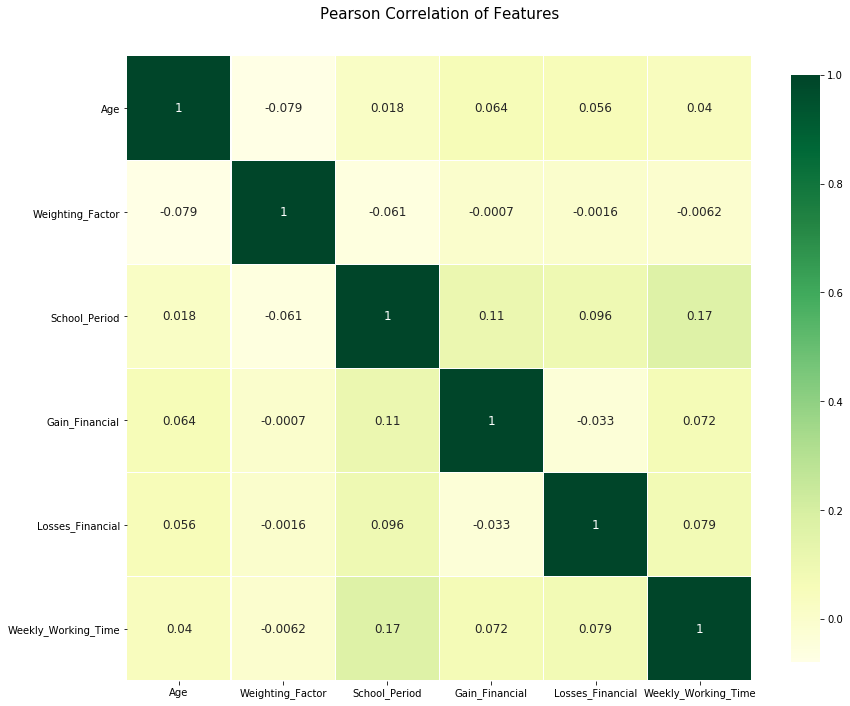

In [8]:
correlation_heatmap(data_income.iloc[:5000])

* Count Plot about Education

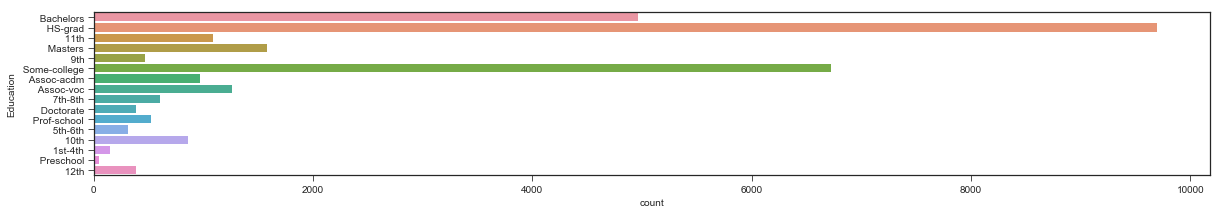

In [9]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="Education", data=data_income)

### Missing Value Representation

* Employment_Type
    
    331
    
    6.62%
    
*  Employment_Area

    331
    
    6.62%

*  Birth_Country

    97
    
    1.94%


In [10]:
def missing_value_representation(data):
    col_names = data.columns
    num_data = data.shape[0]
    for c in col_names:
        num_non = data[c].isin([' ?']).sum()
        if num_non > 0:
            print (c)
            print (num_non)
            print ("{0:.2f}%".format(float(num_non) / num_data * 100))
            print ("\n")


In [11]:
missing_value_representation(data_income)

Employment_Type
1677
5.59%


Employment_Area
1682
5.61%


Birth_Country
539
1.80%


Income
25000
83.33%




## Data Cleaning, covert categorical variables to numerical

*  Dataset is splitted into X(attribute set) and y(class-label).

In [12]:
X = data_income.drop('Income', 1)
y = data_income.Income

* Categorical variables are decided after these code lines below run

- Feature 'Employment_Type' has '9' unique categories
- Feature 'Education' has '16' unique categories
- Feature 'Marital_Status' has '7' unique categories
- Feature 'Employment_Area' has '15' unique categories
- Feature 'Partnership' has '6' unique categories
- Feature 'Ethnicity' has '5' unique categories
- Feature 'Gender' has '2' unique categories
- Feature 'Birth_Country'<font color='red'> 42</font> has  unique categories

In [13]:
#Decide which categorical variable you want to use in your model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(col_name=col_name,unique_cat=unique_cat))

Feature 'Employment_Type' has '9' unique categories
Feature 'Education' has '16' unique categories
Feature 'Marital_Status' has '7' unique categories
Feature 'Employment_Area' has '15' unique categories
Feature 'Partnership' has '6' unique categories
Feature 'Ethnicity' has '5' unique categories
Feature 'Gender' has '2' unique categories
Feature 'Birth_Country' has '42' unique categories


In [14]:
#Although 'Birth_Country' has many unique categories, most categories have a few observations
print(X['Birth_Country'].value_counts().sort_values(ascending=False).head(10))

 United-States    26871
 Mexico             602
 ?                  539
 Philippines        177
 Germany            122
 Canada             115
 Puerto-Rico        112
 El-Salvador         96
 India               94
 Cuba                87
Name: Birth_Country, dtype: int64


In [15]:
# All countries and missing values are defined as other  because they have less than the number of the US
X['Birth_Country'] =['United-States' if x == ' United-States' else 'Other' for x in X['Birth_Country']]
print(X['Birth_Country'].value_counts().sort_values(ascending=False).head(10))

United-States    26871
Other             3129
Name: Birth_Country, dtype: int64


### Convert categorical features to numerical to evaluate it
* Dummy technique is used to convert them to numeric values.
* Dummy technique runs like one-hot-encoded.That is to say, it will convert categorical values to binary values
* Also, in this method missing values having '?' ares defined as new binary attibutes (for instance, Employment_Type_ ?) as you will see below when code runs

In [16]:
# create list of categorical features
todummy_list = ['Employment_Type', 'Education','Marital_Status','Employment_Area','Partnership','Ethnicity','Gender','Birth_Country']

In [17]:
# function to dummy all the categorical variable used for dummy
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies =pd.get_dummies(df[x], prefix=x, dummy_na = False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies], axis = 1)
    return df

In [18]:
X = dummy_df(X,todummy_list)
print(X.head(5))

   Age  Weighting_Factor  School_Period  Gain_Financial  Losses_Financial  \
0   39             77516             13            2174                 0   
1   50             83311             13               0                 0   
2   38            215646              9               0                 0   
3   53            234721              7               0                 0   
4   28            338409             13               0                 0   

   Weekly_Working_Time  Employment_Type_ ?  Employment_Type_ Federal-gov  \
0                   40                   0                             0   
1                   13                   0                             0   
2                   40                   0                             0   
3                   40                   0                             0   
4                   40                   0                             0   

   Employment_Type_ Local-gov  Employment_Type_ Never-worked  \
0               

### Let's check missing values

In [19]:
X = X.replace(' ?',np.NaN)
X.isnull().sum().sort_values(ascending=False).head()
# there is no missing value

Birth_Country_United-States    0
Education_ Bachelors           0
Education_ 1st-4th             0
Education_ 5th-6th             0
Education_ 7th-8th             0
dtype: int64

## Feature Selection
* In this step, important features will be selected
* Firstly, dataset is splitted into 3 subsets as  validation, test and train

In [20]:
y_unknown = y.iloc[5000:]
y_known = y.iloc[:5000].astype(int)
X_unknown = X.iloc[5000:]
X_known = X.iloc[:5000]

In [21]:
split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X_known,y_known,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

* Most important 20 attributes

In [22]:
select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train,y_train)
indices_selected = selected_features.get_support(indices = True)
colnames_selected = [X_train.columns[i] for i in indices_selected]


C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


* Let's see order of important features

In [23]:
print(colnames_selected)

['Age', 'School_Period', 'Gain_Financial', 'Losses_Financial', 'Weekly_Working_Time', 'Employment_Type_ Self-emp-inc', 'Education_ Bachelors', 'Education_ Masters', 'Marital_Status_ Married-civ-spouse', 'Marital_Status_ Never-married', 'Employment_Area_ Exec-managerial', 'Employment_Area_ Other-service', 'Employment_Area_ Prof-specialty', 'Partnership_ Husband', 'Partnership_ Not-in-family', 'Partnership_ Own-child', 'Partnership_ Unmarried', 'Partnership_ Wife', 'Gender_ Female', 'Gender_ Male']


In [24]:
X_train_selected = X_train[colnames_selected]
X_val_selected = X_val[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [25]:
print ("Train dataset: {0}{1}".format(X_train_selected.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val_selected.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test_selected.shape, y_test.shape))

Train dataset: (2800, 20)(2800,)
Validation dataset: (700, 20)(700,)
Test dataset: (1500, 20)(1500,)


### Model Evaluation

In the model evaluation step, many classification algorithms are used and their accuracies are compared.K_fold Cross Validation is used for model selection . As a result, Logistic Regression gives best accuracy.

* 'Logistic Regression'
* 'Random Forest'
* 'Neural Network'
* 'GaussianNB'
* 'DecisionTreeClassifier'
* 'SVM'

In [26]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))

In [27]:
print (models)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,

In [28]:
# definitionof KFold Cross Validation
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train_selected,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train_selected,y_train)
    prediction = models[i].predict(X_val_selected)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

----------------------------------------
LR: 0.8571428571428571
----------------------------------------
Random Forest: 0.8428571428571429
----------------------------------------
Neural Network: 0.8157142857142857
----------------------------------------
GaussianNB: 0.83
----------------------------------------
DecisionTreeClassifier: 0.8057142857142857


C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

----------------------------------------
SVM: 0.8271428571428572


* Lastly, Logistic Regression model was chosen and is fitted and test labels are predicted

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)
prediction = logreg.predict(X_test_selected)

C:\Users\sefik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* Some repots and values about the prediction

In [30]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))


----------------------------------------
Accuracy score:
0.8346666666666667
----------------------------------------
Confusion Matrix:
[[1061   65]
 [ 183  191]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1126
           1       0.75      0.51      0.61       374

    accuracy                           0.83      1500
   macro avg       0.80      0.73      0.75      1500
weighted avg       0.83      0.83      0.82      1500



In [31]:
def plot_roc_curve(y_true, y_pred):
    auc = roc_auc_score(y_true, y_pred)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    # plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the precision-recall curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

AUC: 0.726


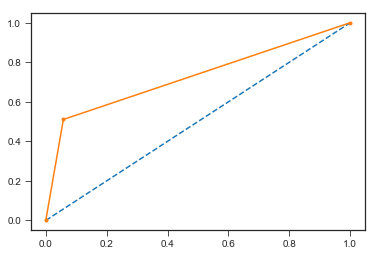

In [32]:
plot_roc_curve(y_test, prediction)

In [33]:
y_prediction = pd.DataFrame(logreg.predict(X_unknown[colnames_selected]),columns= ['y'])